/var/folders/dv/3stz4zmn5jn1dhpcpw10k25h0000gp/T/ipykernel_24541/3160161805.py:38: UserWarning: frames=<function generate at 0x14a2cf9c0> which we can infer the length of, did not pass an explicit *save_count* and passed cache_frame_data=True.  To avoid a possibly unbounded cache, frame data caching has been disabled. To suppress this warning either pass `cache_frame_data=False` or `save_count=MAX_FRAMES`.
  anim = animation.FuncAnimation(fig, update, generate, interval=150)
/opt/homebrew/anaconda3/lib/python3.11/site-packages/matplotlib/animation.py:892: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


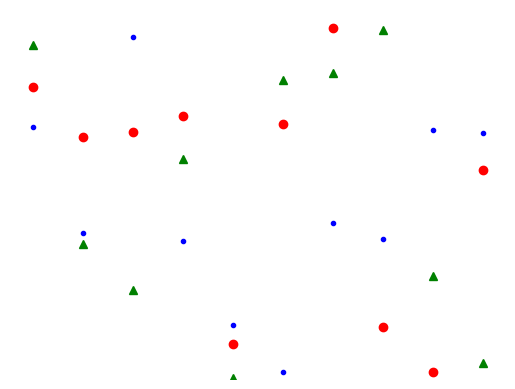

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Set up the figure and axis
fig = plt.figure()
ax = fig.add_subplot(111)

# Number of points
N = 10

# Initial random data for circles, triangles, and dots
x = np.random.rand(N)
y = np.random.rand(N)
z = np.random.rand(N)

# Create the plots
circles, = ax.plot(x, 'ro', label='Circles')
triangles, = ax.plot(y, 'g^', label='Triangles')
dots, = ax.plot(z, 'b.', label='Dots')

# Set axis limits and turn off the axis
ax.set_ylim(0, 1)
plt.axis('off')

# Update function for the animation
def update(data):
    circles.set_ydata(data[0])
    triangles.set_ydata(data[1])
    return circles, triangles

# Data generator function
def generate():
    while True:
        yield np.random.rand(2, N)

# Create the animation
anim = animation.FuncAnimation(fig, update, generate, interval=150)

# Show the plot
plt.show()


[*********************100%%**********************]  1 of 1 completed


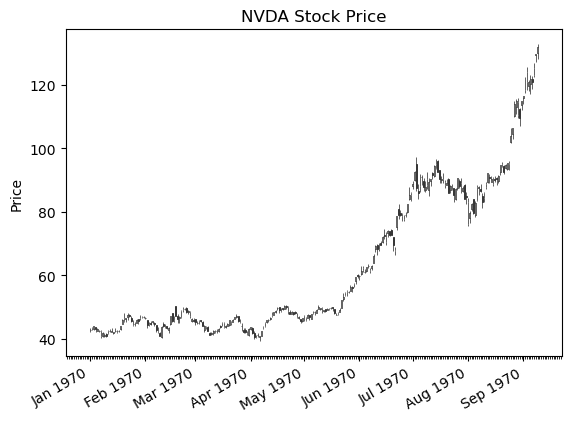

In [10]:
import yfinance as yf
import mplfinance as mpf
import sys
from datetime import date, datetime
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter, DayLocator, MonthLocator

today = date.today()
start = datetime(today.year - 1, today.month, today.day)

symbol = 'NVDA'

if len(sys.argv) == 2:
    symbol = sys.argv[1]

# Fetch historical data
data = yf.download(symbol, start=start, end=today)

# Check if the data is empty
if data.empty:
    print(f"No data found for symbol {symbol}")
    sys.exit()

# Restructure the data to match mplfinance requirements
data.index.name = 'Date'
data.columns = [col.capitalize() for col in data.columns]

# Plot using mplfinance
fig, ax = plt.subplots()

mpf.plot(data, type='candlestick', ax=ax)
ax.xaxis.set_major_locator(MonthLocator())
ax.xaxis.set_minor_locator(DayLocator())
ax.xaxis.set_major_formatter(DateFormatter("%b %Y"))

fig.autofmt_xdate()
plt.title(f'{symbol} Stock Price')
plt.show()


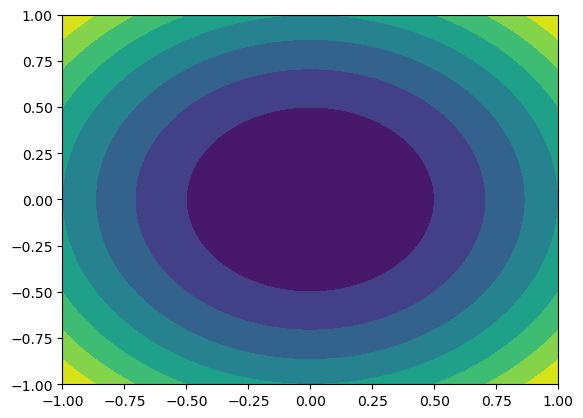

In [12]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm

fig = plt.figure()
ax = fig.add_subplot(111)

u = np.linspace(-1, 1, 100)

x, y = np.meshgrid(u, u)
z = x ** 2 + y ** 2
ax.contourf(x, y, z)

plt.show()


[*********************100%%**********************]  1 of 1 completed


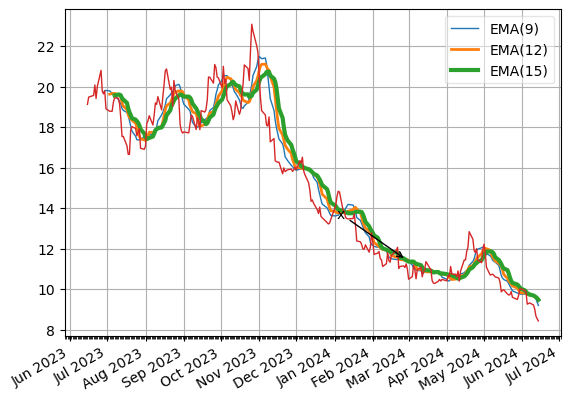

In [20]:
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
from datetime import date, datetime
from matplotlib.dates import DateFormatter, DayLocator, MonthLocator

# Get today's date and date one year ago
today = date.today()
start = datetime(today.year - 1, today.month, today.day)

# Default symbol
symbol = 'SQQQ'

# Check if a symbol was provided as a command line argument
if len(sys.argv) == 2:
    symbol = sys.argv[1]

# Fetch historical data
data = yf.download(symbol, start=start, end=today)

# Check if data is empty
if data.empty:
    print(f"No data found for symbol {symbol}")
    sys.exit()

# Extract dates and closing prices
dates = data.index.to_pydatetime()
close = data['Close'].values

# Create figure and axis
fig = plt.figure()
ax = fig.add_subplot(111)

emas = []
for i in range(9, 18, 3):
    weights = np.exp(np.linspace(-1., 0., i))
    weights /= weights.sum()

    ema = np.convolve(weights, close, mode='valid')
    idx = (i - 6) // 3
    ax.plot(dates[i-1:], ema, lw=idx, label="EMA(%s)" % (i))
    data = np.column_stack((dates[i-1:], ema))
    emas.append(np.rec.fromrecords(data, names=["dates", "ema"]))   

first = emas[0]["ema"].flatten()
second = emas[1]["ema"].flatten()
bools = np.abs(first[-len(second):] - second)/second < 0.0001
xpoints = np.compress(bools, emas[1])

for xpoint in xpoints:
    ax.annotate('x', xy=xpoint, textcoords='offset points',
                xytext=(-50, 30),
                arrowprops=dict(arrowstyle="->"))

leg = ax.legend(loc='best', fancybox=True)
leg.get_frame().set_alpha(0.5)

# Set major and minor ticks format
alldays = DayLocator()
months = MonthLocator()
month_formatter = DateFormatter("%b %Y")
ax.plot(dates, close, lw=1.0, label="Close")
ax.xaxis.set_major_locator(months)
ax.xaxis.set_minor_locator(alldays)
ax.xaxis.set_major_formatter(month_formatter)
ax.grid(True)
fig.autofmt_xdate()
plt.show()


[*********************100%%**********************]  1 of 1 completed


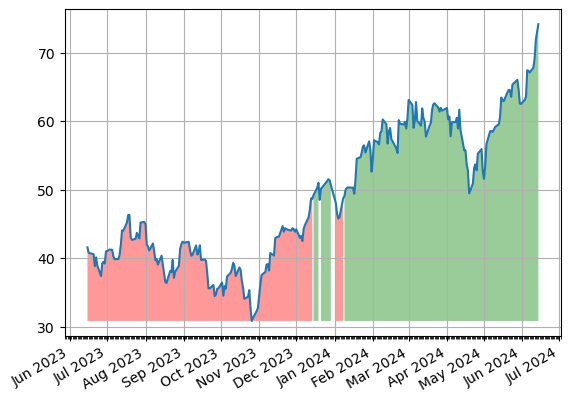

In [24]:
import yfinance as yf
from matplotlib.dates import DateFormatter, DayLocator, MonthLocator
import sys
from datetime import date, datetime
import matplotlib.pyplot as plt
import numpy as np

# Get today's date and date one year ago
today = date.today()
start = datetime(today.year - 1, today.month, today.day)

# Default symbol
symbol = 'TQQQ'

# Check if a symbol was provided as a command line argument
if len(sys.argv) == 2:
    symbol = sys.argv[1]

# Fetch historical data
data = yf.download(symbol, start=start, end=today)

# Check if data is empty
if data.empty:
    print(f"No data found for symbol {symbol}")
    sys.exit()

# Extract dates and closing prices
dates = data.index.to_pydatetime()
close = data['Close'].values

# Create figure and axis
alldays = DayLocator()
months = MonthLocator()
month_formatter = DateFormatter("%b %Y")

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(dates, close)
plt.fill_between(dates, close.min(), close, where=close > close.mean(), facecolor="green", alpha=0.4)
plt.fill_between(dates, close.min(), close, where=close < close.mean(), facecolor="red", alpha=0.4)
ax.xaxis.set_major_locator(months)
ax.xaxis.set_minor_locator(alldays)
ax.xaxis.set_major_formatter(month_formatter)
ax.grid(True)
fig.autofmt_xdate()
plt.show()


[*********************100%%**********************]  1 of 1 completed


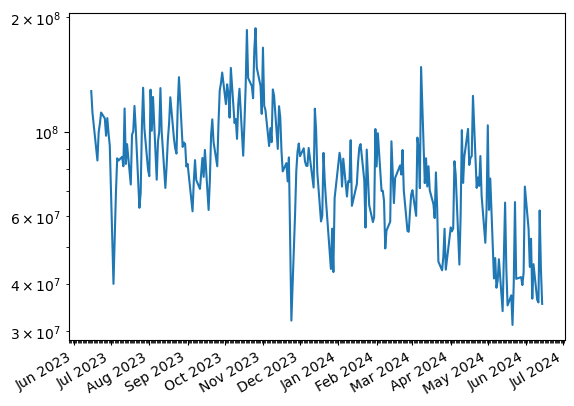

In [28]:
import yfinance as yf
from matplotlib.dates import DateFormatter, DayLocator, MonthLocator
import sys
from datetime import date, datetime
import matplotlib.pyplot as plt
import numpy as np

# Get today's date and date one year ago
today = date.today()
start = datetime(today.year - 1, today.month, today.day)

# Default symbol
symbol = 'TQQQ'

# Check if a symbol was provided as a command line argument
if len(sys.argv) == 2:
    symbol = sys.argv[1]

# Fetch historical data
data = yf.download(symbol, start=start, end=today)

# Check if data is empty
if data.empty:
    print(f"No data found for symbol {symbol}")
    sys.exit()

# Extract dates and volume
dates = data.index.to_pydatetime()
volume = data['Volume'].values

# Create figure and axis
alldays = DayLocator()
months = MonthLocator()
month_formatter = DateFormatter("%b %Y")

fig = plt.figure()
ax = fig.add_subplot(111)
plt.semilogy(dates, volume)
ax.xaxis.set_major_locator(months)
ax.xaxis.set_minor_locator(alldays)
ax.xaxis.set_major_formatter(month_formatter)
fig.autofmt_xdate()
plt.show()


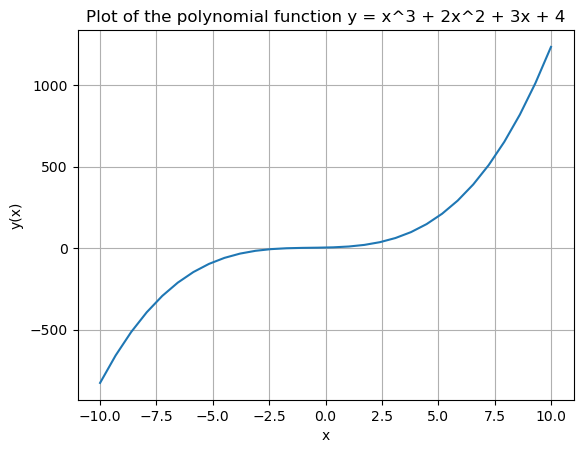

In [30]:
import numpy as np
import matplotlib.pyplot as plt

# Create a polynomial function of the form f(x) = x^3 + 2x^2 + 3x + 4
coefficients = np.array([1, 2, 3, 4]).astype(float)
func = np.poly1d(coefficients)

# Generate x values from -10 to 10 (30 points)
x = np.linspace(-10, 10, 30)

# Evaluate the polynomial function at each x value
y = func(x)

# Plot the polynomial function
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y(x)')
plt.title('Plot of the polynomial function y = x^3 + 2x^2 + 3x + 4')
plt.grid(True)
plt.show()


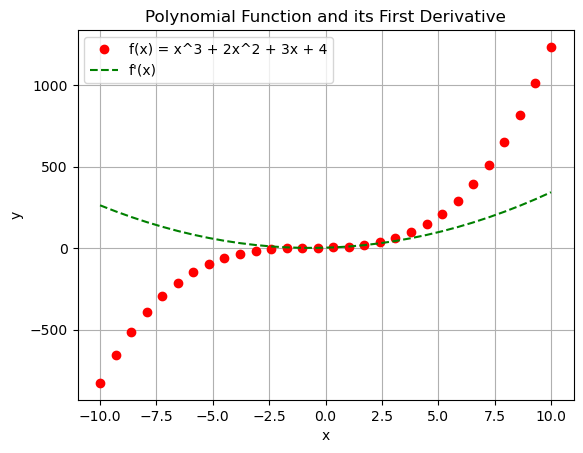

In [32]:
import numpy as np
import matplotlib.pyplot as plt

# Define the polynomial function f(x) = x^3 + 2x^2 + 3x + 4
coefficients = np.array([1, 2, 3, 4]).astype(float)
func = np.poly1d(coefficients)

# Compute the first derivative of the polynomial function
func1 = func.deriv(m=1)

# Generate x values from -10 to 10 (30 points)
x = np.linspace(-10, 10, 30)

# Evaluate the polynomial function and its derivative at each x value
y = func(x)
y1 = func1(x)

# Plot the polynomial function (in red) and its first derivative (in green dashed line)
plt.plot(x, y, 'ro', label='f(x) = x^3 + 2x^2 + 3x + 4')
plt.plot(x, y1, 'g--', label="f'(x)")

# Add labels and legend
plt.xlabel('x')
plt.ylabel('y')
plt.title('Polynomial Function and its First Derivative')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()


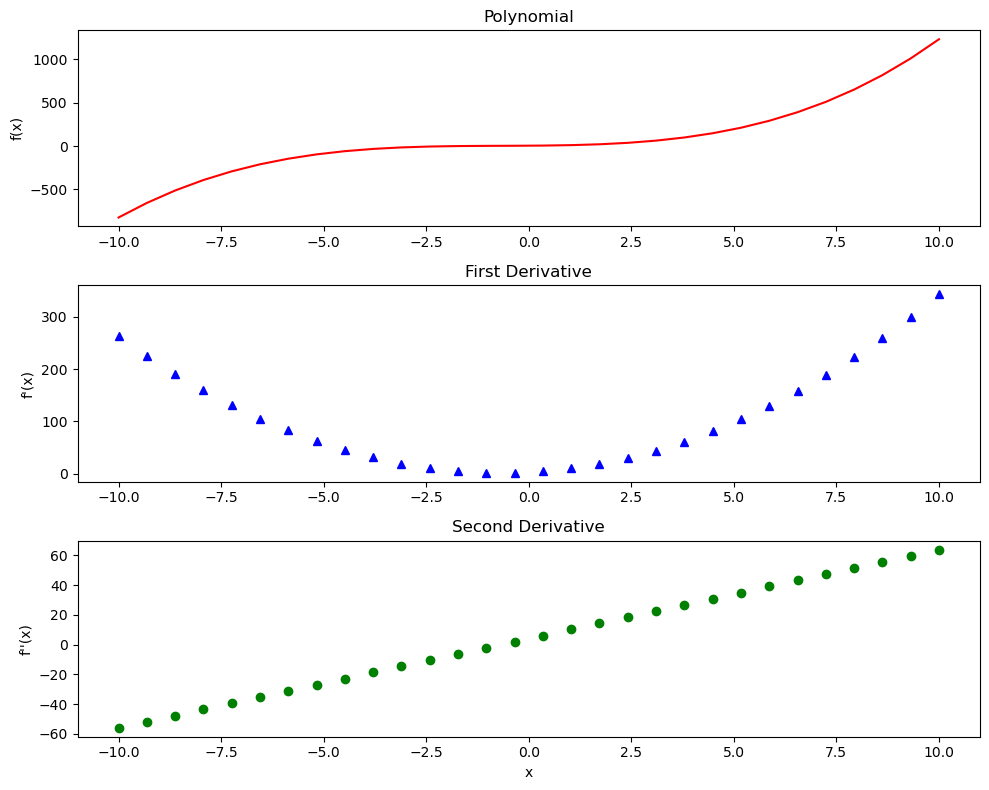

In [34]:
import numpy as np
import matplotlib.pyplot as plt

# Define the polynomial function f(x) = x^3 + 2x^2 + 3x + 4
coefficients = np.array([1, 2, 3, 4]).astype(float)
func = np.poly1d(coefficients)

# Generate x values from -10 to 10 (30 points)
x = np.linspace(-10, 10, 30)

# Evaluate the polynomial function at each x value
y = func(x)

# Compute the first and second derivatives of the polynomial function
func1 = func.deriv(m=1)
y1 = func1(x)

func2 = func.deriv(m=2)
y2 = func2(x)

# Create subplots for the polynomial and its derivatives
plt.figure(figsize=(10, 8))

# Plot the polynomial function
plt.subplot(311)
plt.plot(x, y, 'r-')
plt.title("Polynomial")
plt.ylabel('f(x)')

# Plot the first derivative
plt.subplot(312)
plt.plot(x, y1, 'b^')
plt.title("First Derivative")
plt.ylabel("f'(x)")

# Plot the second derivative
plt.subplot(313)
plt.plot(x, y2, 'go')
plt.title("Second Derivative")
plt.xlabel('x')
plt.ylabel("f''(x)")

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


[*********************100%%**********************]  1 of 1 completed


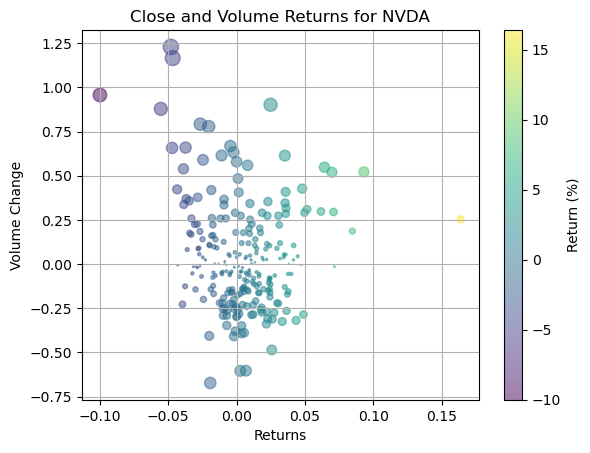

In [36]:
import yfinance as yf
import sys
from datetime import date, timedelta
import matplotlib.pyplot as plt
import numpy as np

# Default symbol
symbol = 'NVDA'

# Override with command line argument if provided
if len(sys.argv) == 2:
    symbol = sys.argv[1]

# Date range: past year until today
end = date.today()
start = end - timedelta(days=365)

# Fetch historical data for the given symbol
data = yf.download(symbol, start=start, end=end)

# Extract the closing prices and volumes
close = data['Close'].values
volume = data['Volume'].values

# Calculate returns and volume changes
ret = np.diff(close) / close[:-1]
volchange = np.diff(volume) / volume[:-1]

# Plotting the scatter plot
fig = plt.figure()
ax = fig.add_subplot(111)
sc = ax.scatter(ret, volchange, c=ret * 100, s=np.abs(volchange * 100), alpha=0.5)
ax.set_title(f'Close and Volume Returns for {symbol}')
ax.set_xlabel('Returns')
ax.set_ylabel('Volume Change')
ax.grid(True)

# Adding a colorbar for reference
plt.colorbar(sc, label='Return (%)')
plt.show()


[*********************100%%**********************]  1 of 1 completed


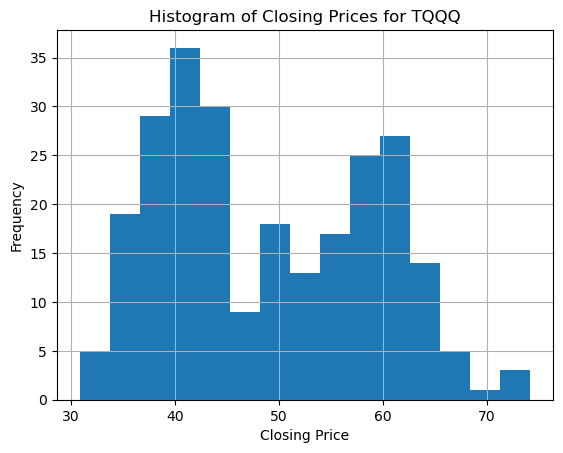

In [40]:
import yfinance as yf
import sys
from datetime import date, timedelta
import matplotlib.pyplot as plt
import numpy as np

# Default symbol
symbol = 'TQQQ'

# Override with command line argument if provided
if len(sys.argv) == 2:
    symbol = sys.argv[1]

# Date range: past year until today
end = date.today()
start = end - timedelta(days=365)

# Fetch historical data for the given symbol
data = yf.download(symbol, start=start, end=end)

# Extract the closing prices
close = data['Close'].values

# Plotting the histogram of closing prices
plt.hist(close, bins=int(np.sqrt(len(close))))
plt.title(f'Histogram of Closing Prices for {symbol}')
plt.xlabel('Closing Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


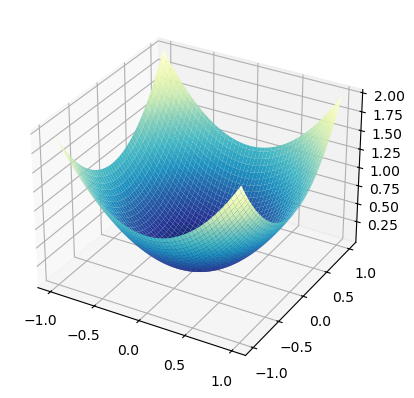

In [42]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm

# Create a new figure
fig = plt.figure()

# Add a 3D subplot
ax = fig.add_subplot(111, projection='3d')

# Create a linear space from -1 to 1 with 100 points
u = np.linspace(-1, 1, 100)

# Create a meshgrid from the linear space
x, y = np.meshgrid(u, u)

# Define the z values as x^2 + y^2
z = x ** 2 + y ** 2

# Plot the surface
ax.plot_surface(x, y, z, cmap=cm.YlGnBu_r)

# Display the plot
plt.show()
